## Аналитика в интернет-магазине

### Знакомство с данными

#### hypothesis

Посмотрим внимтаельнее на список гипотез.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Видим, что подготовлено **9 гипотез** для тестирования. Четыре фактора Reach, Impact, Confidence, Efforts - целочисленного типа int64. Содеражние гипотезы Hypothesis - типа object.

#### orders

Посмотрим  внимательнее на информацию о соверешенных заказах.

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.duplicated().sum() # проверка на дубликаты

0

В данных - **1197 различных заказов**. Идентификатор заказа transactionId, идентификатор пользователя, соврешившего заказ, visitorId и выручка заказа revenue - целочисленного типа int64. Дата и группа - типа object.

#### visitors

Посмотрим внимательнее на таблицу пользователей.

In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors.duplicated().sum() # проверка на дубликаты

0

In [11]:
len(visitors[visitors['group'] == 'A']), len(visitors[visitors['group'] == 'B'])

(31, 31)

In [12]:
visitors['date']

0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
         ...    
57    2019-08-27
58    2019-08-28
59    2019-08-29
60    2019-08-30
61    2019-08-31
Name: date, Length: 62, dtype: object

Видим, что A/B-тест длился один месяц - **август 2018** года. Дата и группа - типа object. Количество пользователей в указанную дату в указанной группе A/B-теста visitors - целочисленный тип int64.

### Вывод

- Загрузили и изучили данные. Далее можно преобразовать типы признаков к более подходящим. Приступим.

<a name="preprocess"></a>
### Подготовка данных

Во-первых, приведем названия столбцов таблицы hypothesis к нижнему регистру.

Далее, так как факторы reach, impact, confidence, efforts измеряются по 10-бальной шкале, преобразуем их в тип uint16. А содеражние гипотезы hypothesis явно преобразуем в тип str.

In [13]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
hypothesis['hypothesis'] = hypothesis['hypothesis'].astype(str)
hypothesis['reach'] = hypothesis['reach'].astype('uint16')
hypothesis['impact'] = hypothesis['impact'].astype('uint16')
hypothesis['confidence'] = hypothesis['confidence'].astype('uint16')
hypothesis['efforts'] = hypothesis['efforts'].astype('uint16')

Приведем названия столбцов таблица orders к нижнему регистру с подчёркиванием.

Преобразуем идентификатор заказа transaction_id, идентификатор пользователя visitor_id и выручку заказа revenue к типу uint64; дату к типу datetime и группу явно к типу str.

In [14]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['transaction_id'] = orders['transaction_id'].astype('uint64')
orders['visitor_id'] = orders['visitor_id'].astype('uint64')
orders['revenue'] = orders['revenue'].astype('uint64')
orders['group'] = orders['group'].astype('str')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Преобразуем в таблице visitors дату к типу datetime и количество пользователей visitors в uint16.

In [16]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['visitors'] = visitors['visitors'].astype('uint64')
visitors['group'] = visitors['group'].astype(str)

### Вывод 

- Привели названия столбцов всех таблиц к нижнему регистру с подчёркиванием.


- Преобразовали: reach, impact, confidence, efforts в тип uint16; visitors, revenue в тип uint64; дату - в тип datetime.

<a name="ice"></a>
### Приоритезация гипотез: фреймоворк ICE

Проверка всех гипотез скорее всего будет стоить очень дорого и ресурсов может не хватить. Чтобы выбрать, что будем тестировать, а чему возможно скажем «нет», приоритезируем сформулированные гипотезы. Это позволит максимизировать ожидаемое улучшение ключевых метрик бизнеса.

**ICE** (от англ. impact, confidence, effort «влияние, уверенность, усилия») — один из самых популярных способов приоритизации задач.

In [18]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [19]:
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективаные гипотезы: 8, 0, 7, 6, 2.

<a name="rice"></a>
### Приоритезация гипотез: фреймоворк RICE

In [20]:
hypothesis['RICE'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(2)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективаные гипотезы: 7, 2, 0, 6, 8.

### Выводы 

- Видим, что для фреймворка RICE пять самых популярных гипотез такие же как и для фреймфорвка ICE 0, 2, 6, 7, 8. Однако приотитет у гипотез разный. Самой приортетной для ICE оказалось гипотеза №8 так как, ICE_8 = (impact * confidence) / efforts = 9\*9/5 = 16.2. Самой приотитетной для RICE оказалась гипотеза №7 RICE_7 = (reach * impact * confidence) / efforts = 10\*8\*7/5 = 112 и это больше RICE_8 =  1\*9\*9/5 = 16.2, за счет того, что у нее охват аудитории больше reach_7 = 10 > reach_8 = 1.


- Первая на тестирование гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Она не только может оказать значительное вляиние на пользователей, но и затронет большое количество всех пользоваталей.

<a name="analysis"></a>
### Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в таблицах orders и visitors. Проанализируем A/B-тест.

*1) Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.*

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: date — дата; group — группа A/B-теста (A или B); orders — количество заказов в указанную дату в указанной группе; buyers — количество пользователей, совершивших хотя бы 1 заказ в указанную дату в указанной группе; revenue — выручка в указанную дату в указанной группе (средний чек);
visitors — количество посетителей интернет-магазина в указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates().

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах.

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', \
                                           'group' : 'max', \
                                           'transaction_id' : pd.Series.nunique, \
                                           'visitor_id' : pd.Series.nunique, \
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', \
                                             'group' : 'max', \
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной с понятными названиями столбцов.

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


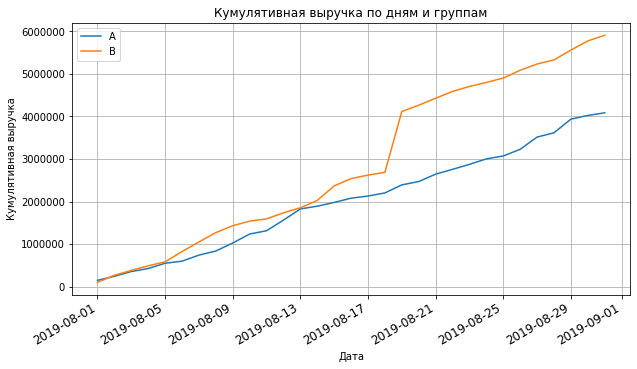

In [26]:
plt.figure(figsize=(10,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.grid(True)
plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Почти с первых дней сегмент В вырывается вперед и лидирует во время всего теста. В середине теста (19 августа) график выручки для группы B резко растёт. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. При заключительном анализе такие аномальные заказы нужно удалить.

*2) Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.*

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

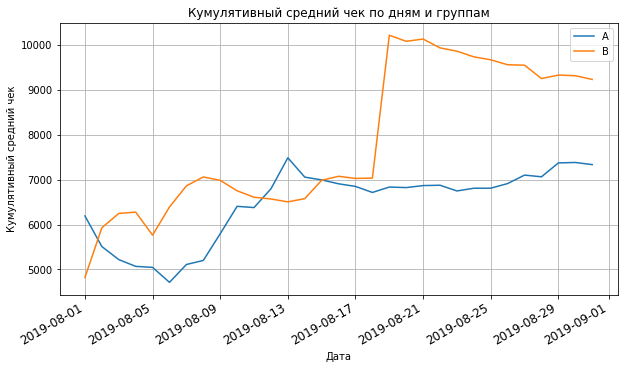

In [27]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.grid(True)
plt.title('Кумулятивный средний чек по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста (19 августа) попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

*3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.*

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
                                                   left_on='date', right_on='date', \
                                                   how='left', suffixes=['A', 'B'])

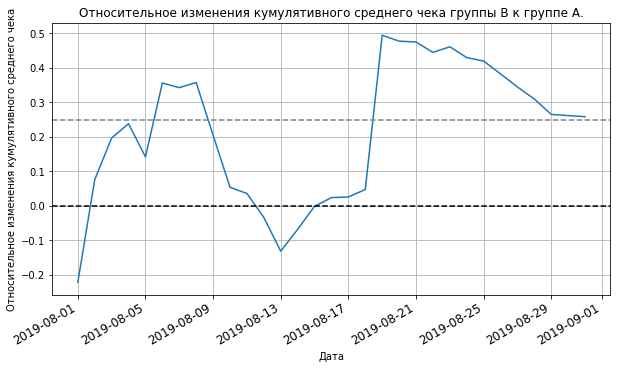

In [29]:
plt.figure(figsize=(10,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')

plt.grid(True)
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Относительное изменения кумулятивного среднего чека')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже. К концу теста кумулятивный средний чек группы В больше кумулятивного среденего чека группы А, но его стомость все еще падает и окончатнльный вывод делать сложно. Нужно посмотреть на "очищенные" данные.

*4)Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.*

Аналогично проанализируем график кумулятивной конверсии.

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [31]:
cumulativeData['conversion'].min(), cumulativeData['conversion'].max()

(0.029217427214536445, 0.03685636856368564)

Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0.029, 0.037]

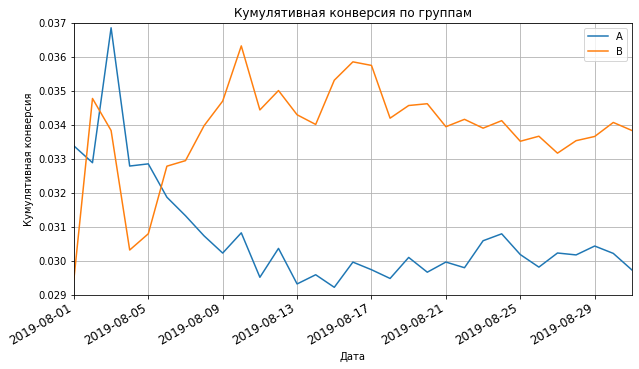

In [32]:
# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(True)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
# задаем масштаб осей
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime("2019-08-31"), 0.029, 0.037])
plt.show()

С самого начала конверсия группы B меньше конверсии группы А, однако уже спустя неделю после начала теста все меянется наоборт: конверсия группы В оказывается больше конверсии группы А. К концу теста графики все еще скачут, не стабилизируются.

*5) Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.*


In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                                           left_on='date', right_on='date', \
                                                                           how='left', suffixes=['A', 'B'])

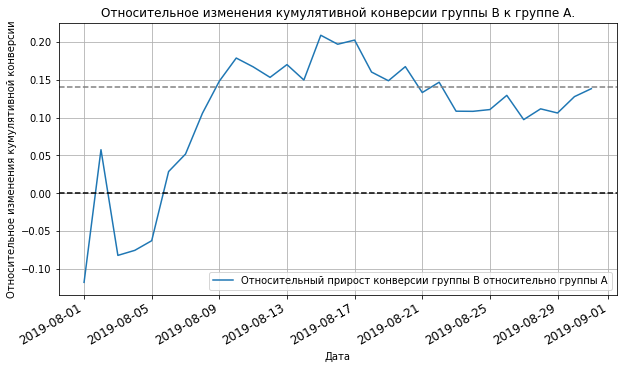

In [34]:
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, \
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('Относительное изменения кумулятивной конверсии группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Относительное изменения кумулятивной конверсии')
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.show()

В начале теста группа B проигрывала группе A, но уже через неделю вырвалась вперёд. Её конверсия немного падала, но теперь постепенно растёт. На момент заверешения теста у группы В зафиксировался прирост конверсии в 14%.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.


*6) Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.*

In [35]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [36]:
orders_by_user = orders.groupby('visitor_id', as_index=False)['transaction_id'].count()
orders_by_user.columns = ['visitor_id', 'count']
orders_by_user.sort_values(by='count', ascending=False).head(10)

,visitor_id,count
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


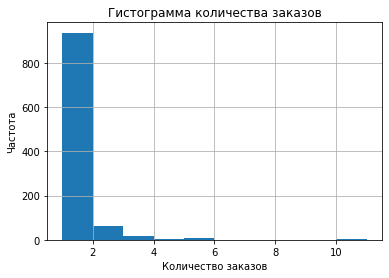

In [37]:
orders_by_user['count'].hist()
plt.title("Гистограмма количества заказов")
plt.xlabel("Количество заказов")
plt.ylabel("Частота")
plt.show()

В данных явно есть пользователи, которые совершили больше 4 заказов — например, 5,8 или 11 заказов. Значительно больше, чем обычный пользователь за неделю. Большинство пользователй всё-таки совершили 1-3 заказа.

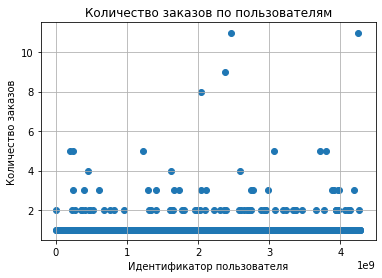

In [38]:
plt.scatter(orders_by_user['visitor_id'], orders_by_user['count'])
plt.title("Количество заказов по пользователям")
plt.xlabel("Идентификатор пользователя")
plt.ylabel("Количество заказов")
plt.grid(True)
plt.show()

Есть несколько пользователей, совершивших 4 и более заказов. По графику можно выбрать 4 в качестве границы аномального количества заказов. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

*7) Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.*

In [39]:
print(np.percentile(orders_by_user['count'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершают более 2 заказов и не более 1% пользователей совершает более 4 заказов. Разумно выбрать 4 или 5 заказов на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

*8) Построим точечный график стоимостей заказов. Сделаем выводы и предположения.*

Изучим гистограмму распределения стоимостей заказов.

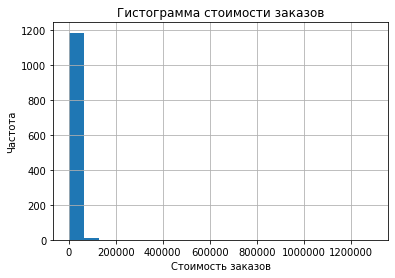

In [40]:
orders['revenue'].hist(bins=20)
plt.title("Гистограмма стоимости заказов")
plt.xlabel("Стоимость заказов")
plt.ylabel("Частота")
plt.show()

В данных явно есть заказы дороже 100 000. Однако большинство всё-таки имеет меньшую выручку. Оценим стоимость заказов ещё одним способом.

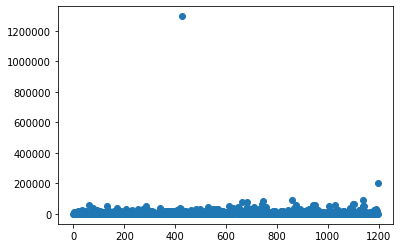

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

In [42]:
orders[orders['revenue'] > 100000]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Есть два очень дорогих заказов. *19 августа был совершен заказ более чем на 1 млн рубей. Это из-за него происходил скачок на графиках кумулятативной выручки и кумулятативного среднего чека выше*.

По графику можно выбрать границу аномальных заказов 100000 рублей. Так как принято отсеивать от 1% до 5% наблюдений с крайними значениями.

*9) Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.*

In [43]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58234 рублей. Можно выбирать границу 60000 рублей для отсечения аномальных заказов.

*10) Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.*

В нашем случае в данных есть выбросы. Параметрические критерии, которые учитывают все значения, будут работать плохо. Даже одно выбивающееся значение существенно повлияет на результат. 

Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

Непарамтерический метод, который мы будем применять для A/B-тестирования, называется st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»). Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости.

Начнём с подготовки данных.

In [44]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [45]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [46]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [47]:
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                  len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                  len(ordersByUsersB['orders'])), name='orders')],axis=0)

Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [48]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Первое число — p-value = 0.008 меньше 0.01, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые отличия. Относительный прирост конверсии группы B к конверсии группы А равен 13.8% — второе число в выводе.

Осталось сравнить средние чеки по «сырым» данным, а затем обе метрики еще раз после удаления выбросов.

*11) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.*

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

In [49]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Первое число - p-value значительно больше 0.05, статистически значимых отличий в среденем чеке между группами нет. Однако относительное различие в среднем чеке между сегментами 25.9%. Скорее всего это аномально дорогие заказы в группе В.

Приступим к анализу анамалий.

*12) Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.*

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 60 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 60 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
len(abnormalUsers)

14

In [51]:
# в данных есть пользователи, которые относятся к двум группам
exmple_two_group_users = orders.query("visitor_id in @abnormalUsers")\
.groupby('visitor_id')['group'].describe().query('unique == 2')
exmple_two_group_users

,count,unique,top,freq
visitor_id,,,,
1316129916,2,2,A,1
2038680547,8,2,A,5
2378935119,9,2,B,5
2458001652,11,2,B,6
4256040402,11,2,A,7
4266935830,2,2,A,1


*Видим, что в данных есть пользователи, которые относятся к обоим группам. В идеальной ситуации такого быть не должно. Пока оставим это как есть. Можно также попробовать их удалить.*

Всего 14 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [53]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.155


0.007 значительно меньше чем 0.05, поэтому еще уверенней отвергаем нулевую гипотезу: в конверсии между группами есть статистически значимые отличия, относительный прирост конверсии группы B к конверсии группы А равен 15.5%

Произошло ли что-нибудь с результатами по среднему чеку?

*13) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.*

In [54]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.407
0.007


Первое число - p-value значительно больше 0.05, статистически значимых отличий в среденем чеке между группами нет. Кроме того для очищенных данных относительное различие в среднем чеке между сегментами менее 1%. Эт

*14) Примем решение по результатам теста и объяснуем его.*

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий. 

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Так как конверсия для сегмента В больше, чем для сегмента А, это значит, что планируемые изменения (добавление формы подписки на все основные страницы) увеличили количество покуптелей в интеренет-магазине. Ожидаемо, что цена среднего чека не изменилась - средний покупатель покупает то и столько, что и сколько он покупал и ранее. При этом общая выручка интерент-магазина увеличилась. Поэтому можно остановить тест и зафиксировать победу группы В. 


<a name="summary"></a>
### Общие выводы



- Данные* были подготовлены: названия столбцов всех таблиц были привелены к нижнему регистру с подчёркиванием и преобразованы типы данных reach, impact, confidence, efforts в тип uint16; revenue, visitors - uint64; даты - в тип datetime.


- Гипотезы были приоритизированы с помощью фреймоворков ICE и RICE: первая на тестирование гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Она не только может оказать значительное вляиние на пользователей, но и затронет большое количество всех пользоваталей. 


- График кумулятативной выруки по дням группам показал, что выручка почти равномерно увеличивается в течение всего теста и почти с первых дней сегмент В вырывается вперед и лидирует во время всего теста.


- График кумулятативного среднего чека показал, что средний чек для группы В больше группы А в конце теста, однако для группы А он становится равномерным и стабилизуруется, а для группы В продолжает падать. График различия среднего чека колеблется: он-то и позволил вам найти аномалии.


- График кумулятативной конверсии по дням и группа показал, что уже спустя неделю после начала теста конверсия группы В оказывается больше конверсии группы А. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.


- С помощью точечных графиков 1) количества заказов по пользователям и 2) стоимости заказов и подсчета 95 и 99 персентилей увидели, 1) что не более 5% пользователей совершают более 2 заказов и не более 1% пользователей совершает более 4 заказов; 2) не более 5% заказов дороже 28000 рублей и не более 1% дороже 58234 рублей. Приняли за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 60 000 рублей. Так мы убрали 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами


- Установили, что есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий и нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.


*Так как конверсия для сегмента В больше, чем для сегмента А, это значит, что планируемые изменения (добавление формы подписки на все основные страницы) увеличили количество покуптелей в интеренет-магазине. Ожидаемо, что цена среднего чека не изменилась - средний покупатель покупает то и столько, что и сколько он покупал и ранее. При этом общая выручка интерент-магазина увеличилась. Поэтому можно остановить тест и зафиксировать победу группы В.*

*Было обнаружено, что в данных есть пользователи, которые относятся к двум группам одновременно.